In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [ ]:
"""set_len = 50
city_set = []

range(len(cities))

for x in range(0, len(cities), set_len):
    city_set.append(cities[x:x+set_len])

print(city_set[0])
"""

In [ ]:
"""city_name = []
for i in range(len(city_set)):
    for city in city_set[i]:
        city_name.append(city)

print(city_name)"""

In [4]:
# Define Imperial units as we requires Max Temperature in Fahrenheit and Wind Speed in mph
units = "imperial"

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query url with units and city name as parameter
query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

In [5]:
# Define lists to save JSON response
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_id = []
date = []

In [6]:
# Define counters to print processing logs
record_count = 1
set_count = 1

# Setting up For loop to call API and print processing log
# Since only 60 API calls can be made per min, we are creating sets of 50 cities and iterating through 
# Use time.sleep method to restrict API calls under 60 per min
# Use Try Except loop to print cities which are not in the list
# Append lists with JSON response

print("Beginning Data Retrieval\n"
      "------------------------------")

for i, city in enumerate(cities):
    if (i%50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        date.append(response["dt"])
        time.sleep(0.05)
        
    except KeyError:
        print("City not found. Skipping...")
        pass

print("------------------------------\n"
      "Data Retrieval Complete\n"
      "------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | marovoay
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | kerrville
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | san andres
Processing Record 7 of Set 1 | catamarca
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | kampot
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 21 of Set 1 | syamzha
Processing Record 22

Processing Record 38 of Set 4 | husavik
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | casper
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | terebovlya
Processing Record 43 of Set 4 | wailuku
Processing Record 44 of Set 4 | batagay-alyta
Processing Record 45 of Set 4 | huron
Processing Record 46 of Set 4 | houma
Processing Record 47 of Set 4 | marsberg
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | kadoma
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | zhob
Processing Record 2 of Set 5 | cururupu
Processing Record 3 of Set 5 | kukuna
Processing Record 4 of Set 5 | henties bay
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | longyearbyen
Processing Record 10 of Set 5 | chipinge
Processing Record 11 of Set 5 | ust-ner

Processing Record 28 of Set 8 | bandarbeyla
Processing Record 29 of Set 8 | baherden
Processing Record 30 of Set 8 | ngunguru
Processing Record 31 of Set 8 | katsuura
Processing Record 32 of Set 8 | gondanglegi
Processing Record 33 of Set 8 | la trinitaria
Processing Record 34 of Set 8 | mandapam
Processing Record 35 of Set 8 | sandominic
Processing Record 36 of Set 8 | fairbanks
Processing Record 37 of Set 8 | san joaquin
Processing Record 38 of Set 8 | alexander city
Processing Record 39 of Set 8 | shoranur
Processing Record 40 of Set 8 | saundatti yellamma
City not found. Skipping...
Processing Record 41 of Set 8 | mayumba
Processing Record 42 of Set 8 | vung tau
Processing Record 43 of Set 8 | likasi
Processing Record 44 of Set 8 | kentau
Processing Record 45 of Set 8 | muli
Processing Record 46 of Set 8 | hami
Processing Record 47 of Set 8 | kapelle
Processing Record 48 of Set 8 | oudtshoorn
Processing Record 49 of Set 8 | qaqortoq
Processing Record 50 of Set 8 | kamsack
Processin

Processing Record 18 of Set 12 | sharan
Processing Record 19 of Set 12 | kruisfontein
Processing Record 20 of Set 12 | kamyshla
Processing Record 21 of Set 12 | ikalamavony
Processing Record 22 of Set 12 | nyaunglebin
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | pevek
Processing Record 25 of Set 12 | tessalit
Processing Record 26 of Set 12 | impfondo
Processing Record 27 of Set 12 | navalmoral de la mata
Processing Record 28 of Set 12 | shingu
Processing Record 29 of Set 12 | rawson
Processing Record 30 of Set 12 | yenagoa
Processing Record 31 of Set 12 | tidore
City not found. Skipping...
Processing Record 32 of Set 12 | nome
Processing Record 33 of Set 12 | wanaka
Processing Record 34 of Set 12 | brae
Processing Record 35 of Set 12 | jiuquan
Processing Record 36 of Set 12 | san pedro
Processing Record 37 of Set 12 | teya
Processing Record 38 of Set 12 | quatre cocos
Processing Record 39 of Set 12 | flic en flac
Processing Record 40 of Set 12 | tres arroyos

### Convert Raw Data to DataFrame

In [8]:
# Create Dataframe from JSON response
cities_df = pd.DataFrame({"City": city_name,
                               "Lat": lat, 
                               "Lng": lon, 
                               "Max Temp": max_temp, 
                               "Humidity": humidity, 
                               "Cloudiness": cloudiness, 
                               "Wind Speed": wind_speed, 
                               "Country": country,
                               "Date": date})
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marovoay,-16.1000,46.6333,68.14,63,73,7.14,MG,1627343413
1,Iqaluit,63.7506,-68.5145,49.73,81,75,2.30,CA,1627343171
2,Kerrville,30.0474,-99.1403,93.54,38,1,3.00,US,1627343415
3,Punta Arenas,-53.1500,-70.9167,42.91,75,0,8.05,CL,1627343387
4,Ushuaia,-54.8000,-68.3000,35.26,80,75,9.22,AR,1627343415
...,...,...,...,...,...,...,...,...,...
577,San Carlos del Zulia,9.0000,-71.9135,76.55,88,100,5.01,VE,1627343600
578,Khovd,48.0056,91.6419,66.78,51,16,1.36,MN,1627343600
579,Mont-Dore,-22.2833,166.5833,73.00,99,90,12.91,NC,1627343600
580,Labuhan,-6.8844,112.2051,74.61,80,8,6.38,ID,1627343493


In [14]:
# Save Dataframe as CSV file for future reference
cities_df.to_csv("../output_data/cities.csv", index=False)

In [15]:
cities_weather_df = pd.read_csv("../output_data/cities.csv")
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marovoay,-16.1000,46.6333,68.14,63,73,7.14,MG,1627343413
1,Iqaluit,63.7506,-68.5145,49.73,81,75,2.30,CA,1627343171
2,Kerrville,30.0474,-99.1403,93.54,38,1,3.00,US,1627343415
3,Punta Arenas,-53.1500,-70.9167,42.91,75,0,8.05,CL,1627343387
4,Ushuaia,-54.8000,-68.3000,35.26,80,75,9.22,AR,1627343415
...,...,...,...,...,...,...,...,...,...
577,San Carlos del Zulia,9.0000,-71.9135,76.55,88,100,5.01,VE,1627343600
578,Khovd,48.0056,91.6419,66.78,51,16,1.36,MN,1627343600
579,Mont-Dore,-22.2833,166.5833,73.00,99,90,12.91,NC,1627343600
580,Labuhan,-6.8844,112.2051,74.61,80,8,6.38,ID,1627343493


## Inspect the data and remove the cities where the humidity > 100%.

In [16]:
# Get stats of all the numeric values for the dataframe
cities_weather_stats = cities_weather_df.describe()
cities_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,20.574043,18.804530,70.109966,70.010309,53.268041,7.765292,1.627343e+09
std,32.949568,89.862575,13.377896,20.635595,37.363456,5.661894,9.316883e+01
min,-54.800000,-175.200000,35.260000,8.000000,0.000000,0.000000,1.627343e+09
25%,-6.537700,-57.648775,61.505000,57.000000,16.000000,3.440000,1.627343e+09
50%,24.633350,23.358300,71.950000,75.000000,57.500000,6.580000,1.627343e+09
75%,47.970875,92.719175,80.095000,86.000000,90.000000,10.360000,1.627344e+09
max,78.218600,177.867900,102.090000,100.000000,100.000000,34.340000,1.627344e+09


In [17]:
# Calculate indices of cities where Humidity is above 100
humidity_outliers = cities_weather_df.loc[cities_weather_df["Humidity"] > 100].index
humidity_outliers

Int64Index([], dtype='int64')

In [18]:
# Create new dataframe by dropping all humidity outliers by index
clean_city_data = cities_weather_df.drop(humidity_outliers, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marovoay,-16.1000,46.6333,68.14,63,73,7.14,MG,1627343413
1,Iqaluit,63.7506,-68.5145,49.73,81,75,2.30,CA,1627343171
2,Kerrville,30.0474,-99.1403,93.54,38,1,3.00,US,1627343415
3,Punta Arenas,-53.1500,-70.9167,42.91,75,0,8.05,CL,1627343387
4,Ushuaia,-54.8000,-68.3000,35.26,80,75,9.22,AR,1627343415
...,...,...,...,...,...,...,...,...,...
577,San Carlos del Zulia,9.0000,-71.9135,76.55,88,100,5.01,VE,1627343600
578,Khovd,48.0056,91.6419,66.78,51,16,1.36,MN,1627343600
579,Mont-Dore,-22.2833,166.5833,73.00,99,90,12.91,NC,1627343600
580,Labuhan,-6.8844,112.2051,74.61,80,8,6.38,ID,1627343493


## Plotting the Data

In [24]:
# Define function for Scatter Plots

def scatter_plot (y_axis_col, ylabel_name):
    # Define x_axis and y_axis for scatter plot 
    x_axis = clean_city_data["Lat"]
    y_axis = clean_city_data[y_axis_col]

    plt.scatter(x_axis, y_axis, edgecolors='black')

    # Labels and Titles for the plot
    # using date.today to display current date
    plt.xlabel("Latitude")
    plt.ylabel(ylabel_name)
    plt.title(f"City Latitude vs. {y_axis_col} ({date.today().strftime('%d/%m/%Y')})")

    # Saving scatter plot graph as png
    #plt.savefig(f"../output_data/{y_axis_col}_scatterplot.png")

    # Plot gridlines
    plt.grid(True)

    # Display plot
    plt.show()

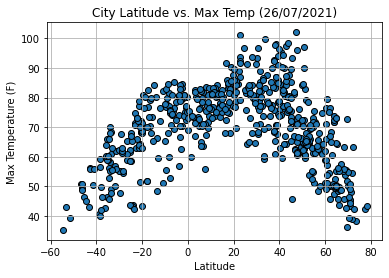

In [25]:
# Latitude vs. Temperature Scatter Plot

scatter_plot("Max Temp", "Max Temperature (F)")

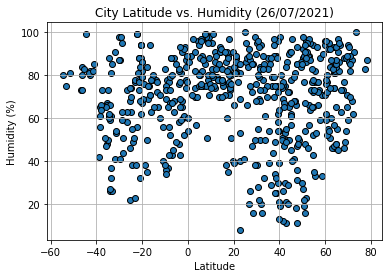

In [26]:
# Latitude vs. Humidity Scatter Plot
scatter_plot("Humidity", "Humidity (%)")

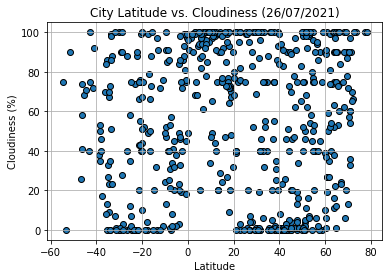

In [27]:
# Latitude vs. Cloudiness Scatter Plot
scatter_plot("Cloudiness", "Cloudiness (%)")

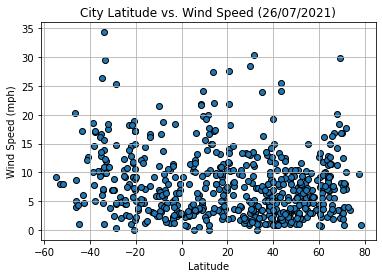

In [28]:
# Latitude vs. Wind Speed Scatter Plot
scatter_plot("Wind Speed", "Wind Speed (mph)")

In [32]:
# Dataframe for cities in Northern Hemisphere (greater than or equal to 0 degrees latitude)

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Iqaluit,63.7506,-68.5145,49.73,81,75,2.30,CA,1627343171
2,Kerrville,30.0474,-99.1403,93.54,38,1,3.00,US,1627343415
5,San Andrés,12.5847,-81.7006,84.22,79,75,10.36,CO,1627343302
13,Kampot,10.6167,104.1833,82.45,83,97,8.14,KH,1627343418
14,Hilo,19.7297,-155.0900,77.25,91,90,6.91,US,1627342832
...,...,...,...,...,...,...,...,...,...
574,Yate,51.5407,-2.4184,65.35,88,100,1.01,GB,1627343598
575,Vikhorevka,56.1201,101.1636,71.19,53,6,3.00,RU,1627343599
577,San Carlos del Zulia,9.0000,-71.9135,76.55,88,100,5.01,VE,1627343600
578,Khovd,48.0056,91.6419,66.78,51,16,1.36,MN,1627343600


In [37]:
# Dataframe for cities in Southern Hemisphere (less than 0 degrees latitude)

southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marovoay,-16.1000,46.6333,68.14,63,73,7.14,MG,1627343413
3,Punta Arenas,-53.1500,-70.9167,42.91,75,0,8.05,CL,1627343387
4,Ushuaia,-54.8000,-68.3000,35.26,80,75,9.22,AR,1627343415
6,San Fernando del Valle de Catamarca,-28.4696,-65.7852,54.59,44,3,4.45,AR,1627343416
7,Busselton,-33.6500,115.3333,49.08,61,99,29.51,AU,1627343417
...,...,...,...,...,...,...,...,...,...
563,Panji,-7.7253,114.0995,75.56,52,21,4.00,ID,1627343595
571,Pekalongan,-6.8886,109.6753,74.01,67,2,3.85,ID,1627343597
576,Kawalu,-7.3817,108.2082,70.63,88,57,1.83,ID,1627343599
579,Mont-Dore,-22.2833,166.5833,73.00,99,90,12.91,NC,1627343600


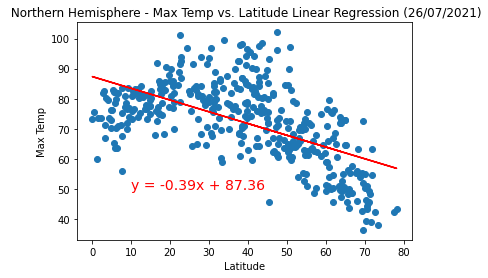

The r-value is: -0.5867088566834222


In [48]:
# Northern Hemisphere: Max Temp vs. Latitude Linear Regression
# Define x_axis and y_axis for scatter plot 

x_axis_h = northern_hemisphere["Lat"]
y_axis_h = northern_hemisphere["Max Temp"]

linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Max Temp"], 
                  "Max Temp", 10, 50)

In [47]:
# Define function for linear regression
def linear_regression(x_axis_h, y_axis_h, y_labelname_h, a, b):
    plt.scatter(x_axis_h, y_axis_h)

    # Labels and Titles for the plot
    # using date.today to display current date
    plt.xlabel("Latitude")
    plt.ylabel(y_labelname_h)
    plt.title(f" Northern Hemisphere - {y_labelname_h} vs. Latitude Linear Regression ({date.today().strftime('%d/%m/%Y')})")

    # Saving scatter plot graph as png
    #plt.savefig(f"../output_data/{y_labelname_h}_scatterplot.png")

    (slope, intercept, r_value, p_value, std_err) = linregress(x_axis_h,y_axis_h)

    # Line equation
    regress_value = slope*x_axis_h + intercept

    # Line equation to print on the scatter plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Line plot for regerssion line
    plt.plot(x_axis_h,regress_value, "r-")

    # Display regression line
    plt.annotate(line_eq,(a,b), fontsize=14, color="red")

    # Display plot
    plt.show()
    
    # Calculate r-value
    print(f"The r-value is: {r_value}")

In [ ]:
except:
        print("City not found. Skipping...")
        pass